# Ковариация и корреляция

<div style="text-indent: 40px;"> Ковариация и корреляция Пирсона являются статистическими инструментами, которые используются для оценки взаимосвязи между двумя случайными величинами

### Ковариация

<div style="text-indent: 40px;">Ковариация показывает, как изменяется одна величина при изменении другой. Более формально: ковариация помогает определить, какая у этих величин совместная изменчивость.



<div style="border:2px solid black; padding:10px;">
  <p> Ковариация — это мера совместной изменчивости двух величин.</p>
</div>

<div style="text-indent: 40px;"> Сгенерируем данные, которые дают положительную, отрицательную и нулевую ковариацию.

In [1]:
# Загрузка библиотек
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Создание данных для положительной ковариации
np.random.seed(0)
x_pos = np.random.rand(100) * 50
y_pos = x_pos + np.random.normal(0, 10, 100)  # добавляем немного шума

# Создание данных для отрицательной ковариации
x_neg = np.random.rand(100) * 50
y_neg = -x_neg + np.random.normal(0, 10, 100)  # отрицательная зависимость + шум

# Создание данных для нулевой ковариации
x_zero = np.random.rand(100) * 50
y_zero = np.random.rand(100) * 50  # независимые друг от друга

<div style="text-indent: 40px;"> Построим по этим данным графиики. Чтобы определить, есть ли зависимость между двумя величинами, мы можем использовать обычную 
диаграмму рассеивания (англ. scatter plot)

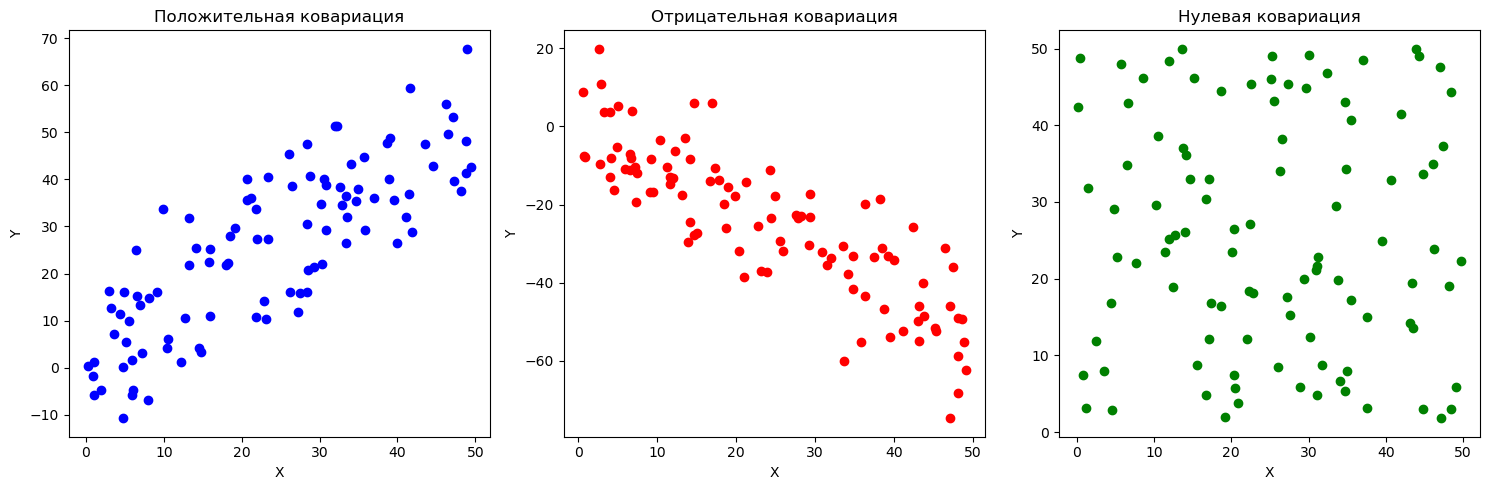

In [3]:
# Построение графиков
plt.figure(figsize=(15, 5))

# Положительная ковариация
plt.subplot(1, 3, 1)
plt.scatter(x_pos, y_pos, color='blue')
plt.title('Положительная ковариация')
plt.xlabel('X')
plt.ylabel('Y')

# Отрицательная ковариация
plt.subplot(1, 3, 2)
plt.scatter(x_neg, y_neg, color='red')
plt.title('Отрицательная ковариация')
plt.xlabel('X')
plt.ylabel('Y')

# Нулевая ковариация
plt.subplot(1, 3, 3)
plt.scatter(x_zero, y_zero, color='green')
plt.title('Нулевая ковариация')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

<div style="text-indent: 40px;"> Для человека очень явственно видно, где есть взаимосвязь между двумя переменными. Попробуем посчитать ковариацию математически

<div style="text-indent: 40px;"> Коэффициент ковариации рассчитывают по формуле:

$$
\text{Cov}(X, Y) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}),
$$

где:
- $X$ и $Y$ — рассматриваемые величины,
- $i$ — номер отдельного измерения,
- $x_i, y_i$ — значения по $X$ и $Y$ для измерения под номером $i$,
- $\bar{x}$ и $\bar{y}$ — средние значения по всем измерениям для $X$ и $Y$,
- $n$ — количество измерений.


Разберёмся, что происходит в формуле: 
 1) для каждого наблюдения рассчитываем разницу со средним по величине X,
 2) разницу со средним по величине Y,
 3) перемножаем полученные значения,
 4) складываем результат по всем наблюдениям в количестве n,
 5) усредняем по всем наблюдениям: делим на n−1.

<div style="text-indent: 40px;"> Напишем функцию для рассчета ковариации

In [4]:
def covariation_calculation(x,y):
#     где x и y вектор значений переменных между которыми выявляется взаимосвязь
#     возвращает функцию одно число означающее коэффициент ковариации
    mean = sum(x)/len(x)
    mean2 = sum(y)/len(y)
    difference = [i - mean for i in x]
    difference2 = [j - mean2 for j in y]
    multiplication = [a*b for a,b in zip(difference,difference2)]
    coefficient = sum(multiplication)/(len(multiplication)-1)
    return coefficient

<div style="text-indent: 40px;"> Применим функцию к переменным, которые сгенирировали выше, для трех вариантов ковариации

In [5]:
# применение функции для рассчета коэффициента корреляции
result_pos = covariation_calculation(x_pos, y_pos)
result_neg = covariation_calculation(x_neg, y_neg)
result_zero = covariation_calculation(x_zero, y_zero)

In [6]:
# Вывод результатов
print(f"Ковариация между x_pos и y_pos (ожидается положительная): {result_pos:.2f}")
print(f"Ковариация между x_neg и y_neg (ожидается отрицательная): {result_neg:.2f}")
print(f"Ковариация между x_zero и y_zero (ожидается близкая к нулю): {result_zero:.2f}")

Ковариация между x_pos и y_pos (ожидается положительная): 207.25
Ковариация между x_neg и y_neg (ожидается отрицательная): -249.51
Ковариация между x_zero и y_zero (ожидается близкая к нулю): -9.20


<div style="text-indent: 40px;"> Чем больше по модулю значение ковариации, тем сильнее связь между переменными. <br>

Однако, важно отметить следующее:

- Ковариация сама по себе не дает полного понимания силы связи, так как она зависит от масштабов измерения переменных. К примеру, если вы измеряете одну переменную в метрах, а другую в километрах, значение ковариации будет исказлено из-за разности масштабов.
- Для более наглядной оценки силы линейной связи используют коэффициент корреляции Пирсона, который нормализует значение ковариации, делая его независимым от единиц измерения данных и позволяет интерпретировать силу связи в диапазоне от -1 до 1.

<div style="text-indent: 40px;"> Прежде чем перейти к понятию кореляции познакомимся со втроенными **готовыми функциями** для подсчета ковариации _cov_ из пакета NumPy

In [7]:
# Расчет ковариации
covariance_matrix_pos = np.cov(x_pos, y_pos)
covariance_matrix_neg = np.cov(x_neg, y_neg)
covariance_matrix_zero = np.cov(x_zero, y_zero)

In [8]:
# выведение матрицы на экран
covariance_matrix_pos

array([[209.89347337, 207.24608789],
       [207.24608789, 304.87842202]])

<div style="text-indent: 40px;"> Функция _cov_ в NumPy возвращает ковариационную матрицу, которая представляет собой таблицу, показывающую ковариацию между каждой парой переменных в наборе данных. Если вы передаете два вектора переменных X и Y, ковариационная матрица будет иметь размер 2x2, где каждый элемент матрицы соответствует ковариации между парой переменных: <br>

 - Элемент [0, 0] — это дисперсия переменной X (ковариация X с самим собой).
 - Элемент [1, 1] — это дисперсия переменной Y (ковариация Y с самой собой).
 - Элементы [0, 1] и [1, 0] — это идентичные значения, представляющие ковариацию между X и Y.
 
 <div style="text-indent: 40px;"> Таким образом, ковариационная матрица содержит информацию не только о связи между разными переменными, но и о вариабельности каждой из переменных по отдельности. Это полезно, когда работа ведется с многомерными данными, и нужно понимать взаимосвязь не только в парах переменных, но и между всеми комбинациями переменных в наборе данных
 

In [9]:
# Получение значения ковариации из матрицы
result_pos = covariance_matrix_pos[0, 1]
result_neg = covariance_matrix_neg[0, 1]
result_zero = covariance_matrix_zero[0, 1]

# Вывод результатов
print(f"Ковариация между x_pos и y_pos (ожидается положительная): {result_pos:.2f}")
print(f"Ковариация между x_neg и y_neg (ожидается отрицательная): {result_neg:.2f}")
print(f"Ковариация между x_zero и y_zero (ожидается близкая к нулю): {result_zero:.2f}")

Ковариация между x_pos и y_pos (ожидается положительная): 207.25
Ковариация между x_neg и y_neg (ожидается отрицательная): -249.51
Ковариация между x_zero и y_zero (ожидается близкая к нулю): -9.20


<div style="text-indent: 40px;">Как и ожидалось, данные коэффициента ковариации полученные с помощью готовой функции совпадают с данными от самописной

<div style="text-indent: 40px;">Таким образом, что нам дает ковариация? <br>

**Оценка Взаимосвязи:** Ковариация показывает, существует ли линейная взаимосвязь между двумя переменными и каково её направление. Если ковариация положительна, то переменные имеют тенденцию увеличиваться вместе. Если ковариация отрицательна, то одна переменная имеет тенденцию увеличиваться, когда другая уменьшается.

**Оценка Силы Связи:** Чем больше абсолютное значение ковариации, тем сильнее линейная связь между переменными. Однако, ковариация зависит от масштабов измерения переменных, поэтому она не может использоваться для сравнения силы связи между разными парами переменных.

### Корреляция

<div style="text-indent: 40px;">Как мы выяснили, ковариация зависит от масштаба величин, именно это мешает интерпретировать её абсолютное значение. Чем больше масштаб величины, тем больше у неё разброс. За разброс отвечает стандартное отклонение, поэтому, имеет смысл на него разделить коэффициент ковариации. Это деление стандартизирует коэффициент ковариации, приводя его к безразмерному виду, который не зависит от единиц измерения переменных и который всегда находится в диапазоне от -1 до 1:

Коэффициент корреляции Пирсона вычисляют по формуле:

$$
r_{X, Y} = \frac{\text{Cov}(X, Y)}{s_X \cdot s_Y}
$$

где:
- $\text{Cov}(X, Y)$ — коэффициент ковариации между величинами $X$ и $Y$;
- $s_X$ — стандартное отклонение величины $X$;
- $s_Y$ — стандартное отклонение величины $Y$.


<div style="border:2px solid black; padding:10px;">
  <p> Корреляция — это статистический показатель, который измеряет степень и направление линейной связи между двумя переменными. </p>
</div>

<div style="text-indent: 40px;"> Поскольку для рассчета коэффициента корреляции нам нужно считать дисперсию и стандартное отклонение - вспомним формулу дисперсии и стандартного отклонения:

$$
\text{Var}(X) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2,
$$

$$
s_X = \sqrt{\text{Var}(X)}.
$$

Чтобы вычислить стандартное отклонение, нужно:

1. Для каждого наблюдения посчитать разницу со средним,
2. Найти квадраты отклонений,
3. Вычислить дисперсию,
4. Найти стандартное отклонение.


<div style="text-indent: 40px;">Напишем сначала функцию для рассчета стандартного отклонения и дисперсии

In [10]:
def sd_calculation_and_disp(x):
    mean = sum(x)/len(x)
    difference_sqare = [(i - mean)**2 for i in x]
    disp = sum(difference_sqare)/(len(difference_sqare)-1)
    sd = disp**0.5
    return disp, sd

<div style="text-indent: 40px;">Пример работы функции:

In [11]:
# вектор значений
a = [46, 37, 51, 47, 42, 39, 43, 46, 45]

In [12]:
# применение функции к переменной а
disp, sd = sd_calculation_and_disp(a)

print("Дисперсия:", disp)
print("Стандартное отклонение:", sd)

Дисперсия: 18.25
Стандартное отклонение: 4.272001872658765


<div style="text-indent: 40px;">Функция работает нормально

<div style="text-indent: 40px;">Напишем функцию для подсчета коэффициента корреляции Пирсона

In [13]:
def corr_coef(x,y):
    mean = sum(x)/len(x)
    mean2 = sum(y)/len(y)
    difference_sqare = [(i - mean)**2 for i in x]
    difference2_sqare = [(j - mean2)**2 for j in y]
    disp1 = sum(difference_sqare)/(len(difference_sqare)-1)
    disp2 = sum(difference2_sqare)/(len(difference2_sqare)-1)
    sd1 = disp1**0.5
    sd2 = disp2**0.5
    difference = [i - mean for i in x]
    difference2 = [j - mean2 for j in y]
    multiplication = [a*b for a,b in zip(difference,difference2)]
    coefficient_covariation = sum(multiplication)/(len(multiplication)-1)
    corr_coef = coefficient_covariation/(sd1*sd2)
    return corr_coef

<div style="text-indent: 40px;">Попробуем применить функцию

In [14]:
# возьмем для вектора значений
x = [21,27,24,19,22,25]
y = [14,19,15,13,17,18]

# применение функции
result = corr_coef(x,y)

# выведение результатов
print("Коэффициент корреляции Пирсона:", result)

Коэффициент корреляции Пирсона: 0.8748177652797064


<div style="text-indent: 40px;">Либо, можно написать функцию короче, вызывая уже написанные ранее функции для подсчета ковариации и стандартного отклонения внутри функции для подсчета корреляции

In [15]:
def corr_coef_simple(x,y):
    cov_coef = covariation_calculation(x,y)
    _, sd1 = sd_calculation_and_disp(x)
    _, sd2 = sd_calculation_and_disp(y)
    corr_coef2 = cov_coef/(sd1*sd2)
    return corr_coef2

In [16]:
# применение функции
result = corr_coef_simple(x,y)

# выведение результатов
print("Коэффициент корреляции Пирсона:", result)

Коэффициент корреляции Пирсона: 0.8748177652797064


<div style="text-indent: 40px;">Сравнение со встроенной функцией _corrcoef_ из пакета NumPy для вычисления коэффициента корреляции Пирсона

In [17]:
# применение встроенной функции к тем же данным
correlation_matrix = np.corrcoef(x, y)

In [18]:
# выведение результатов
correlation_matrix 

array([[1.        , 0.87481777],
       [0.87481777, 1.        ]])

<div style="text-indent: 40px;"> Функция <em>np.corrcoef</em> из пакета NumPy возвращает матрицу коэффициентов корреляции Пирсона, которая аналогична ковариационной матрице.

 <div style="text-indent: 40px;">Коэффициенты корреляции Пирсона между двумя разными переменными X и Y отражаются в элементах r(X, Y) в [0, 1] и (Y, X) в [1, 0] матрицы корреляций. Коэффициент 1 на диагонали в положении [0, 0] и [1, 1] означает, что переменная полностью коррелирует сама с собой r(X, X) и r(Y, Y).

In [19]:
# извленение нужно коэффициента из матрицы
pearson_correlation = correlation_matrix [0, 1]

print("Коэффициент корреляции Пирсона:", pearson_correlation)

Коэффициент корреляции Пирсона: 0.8748177652797064


<div style="text-indent: 40px;"> Как ожидалось, мы получаем одинаковый результат подсчета коэффициента корреляции Пирсона с использованием готовой функции <em>corrcoef</em> и самописной. 

<div style="text-indent: 40px;">Ранее мы генерировали данные с положительной, отрицательной и близкой к нулю ковариацией, строили для них графики. Теперь для них же посчитаем коэффициент коррелции Пирсона.

In [20]:
# применение функции к данным 
cor_matrix_pos = np.corrcoef(x_pos, y_pos)
cor_matrix_neg = np.corrcoef(x_neg, y_neg)
cor_zero = np.corrcoef(x_zero, y_zero)

In [21]:
# Получение значения ковариации из матрицы
result_pos_cor = cor_matrix_pos[0, 1]
result_neg_cor = cor_matrix_neg[0, 1]
result_zero_cor = cor_zero[0, 1]

# Вывод результатов
print(f"Корреляция между x_pos и y_pos (ожидается положительная):{result_pos_cor:.2f}, ковариация: {result_pos:.2f}")
print(f"Корреляция между x_neg и y_neg (ожидается отрицательная): {result_neg_cor:.2f}, ковариация: {result_neg:.2f}")
print(f"Корреляция между x_zero и y_zero (ожидается близкая к нулю): {result_zero_cor:.2f}, ковариация: {result_zero:.2f}")

Корреляция между x_pos и y_pos (ожидается положительная):0.82, ковариация: 207.25
Корреляция между x_neg и y_neg (ожидается отрицательная): -0.86, ковариация: -249.51
Корреляция между x_zero и y_zero (ожидается близкая к нулю): -0.04, ковариация: -9.20


 - Если коэффициент близок к +1, между переменными существует сильная прямая линейная связь (как одна переменная увеличивается, так и другая тоже увеличивается).
 - Если коэффициент близок к -1, между переменными существует сильная обратная линейная связь (как одна переменная увеличивается, другая уменьшается).
 - Если коэффициент близок к 0, это указывает на отсутствие линейной связи между переменными.

#### Примеры задач

**Задача:** Аналитический отдел исследует взаимосвязь температуры и количества бракованных изделий, и как следствие убытков, на кондитерской фабрике. Найдите коэффициент корреляции Пирсона для величин «температура» и «убытки».  

In [22]:
#  переменная x это температура в цехе, y это убытки при этой температуре
x= [21,27,24,19,22,25]
y= [1400,1900,1500,1300,1700,1800]

In [23]:
# применяем функцию для подсчета дисперсии и стандартного отклонения
disp1, sd1  = sd_calculation_and_disp(x)
disp2, sd2 = sd_calculation_and_disp(y)

# вывод результатов
print(f"Дисперсия выборки x: {disp1:.2f}, "
      f"Стандартное отклонение выборки x: {sd1:.2f}\n"
      f"Дисперсия выборки y: {disp2:.2f}, "
      f"Стандартное отклонение выборки y: {sd2:.2f}")


Дисперсия выборки x: 8.40, Стандартное отклонение выборки x: 2.90
Дисперсия выборки y: 56000.00, Стандартное отклонение выборки y: 236.64


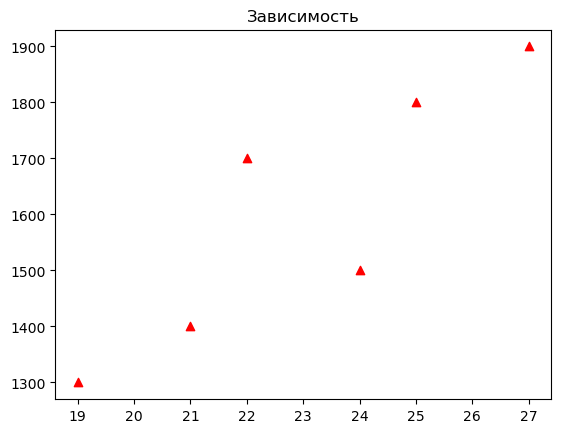

In [24]:
# строим график

plt.scatter(x,y, color = 'red', marker = '^')
plt.title('Зависимость')
plt.show()

<div style="text-indent: 40px;"> Сначала убедиться в том, что между рассматриваемыми величинами действительно есть линейная зависимость, и уже затем использовать коэффициент корреляции Пирсона. <strong>При наличии сильных выбросов использовать коэффициент корреляции Пирсона нельзя!</strong> Нужно использовать другие методы, которые более устойчивы к выбросам. Например, ранговый коэффициент корреляции Спирмана. 

In [25]:
# считаем коэффициенты ковариации и корреляции
result_covar = covariation_calculation(x, y)
result_correlation = corr_coef_simple(x, y)

# выведение результатов
print(f"Коэффициент ковариации: {result_covar} \n"
      f"Коэффициент корреляции Пирсона: {result_correlation}")

Коэффициент ковариации: 600.0 
Коэффициент корреляции Пирсона: 0.8748177652797064


<div style="text-indent: 40px;"> Мы получили коэффициент корреляции Пирсона для температуры и количества бракованных изделий равен 0.87. Это достаточно близко к 1 — верхней границе диапазона. Значит, две величины имеют сильную положительную взаимосвязь. 

<div style="border:2px solid black; padding:20px;">
  <p>Коэффициент корреляции Пирсона не зависит от масштаба величин.</p>
</div>



**Задача:** Есть 5 наблюдений о дневном объёме торгов двух активов: A и B. Актив A — это золото. Актив B — это акции высокорисковой компании. Объём торгов будем считать в миллионах долларов. Рассчитайте коэффициент ковариации и корреляции Пирсона для этих величин. 

In [26]:
x = [300,320,290,350,310]
y = [150,120,180,90,160]

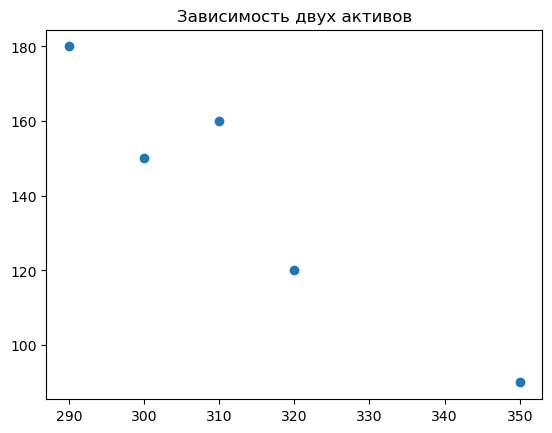

In [27]:
plt.scatter(x,y)
plt.title('Зависимость двух активов')
plt.show()

In [28]:
result_covar = covariation_calculation(x, y)
result_correlation = corr_coef_simple(x, y)

print(f"Коэффициент ковариации: {result_covar} \n"
      f"Коэффициент корреляции Пирсона: {result_correlation}")

Коэффициент ковариации: -775.0 
Коэффициент корреляции Пирсона: -0.9521574310926244


<div style="text-indent: 40px;"> Мы получили коэффициент корреляции Пирсона для двух активов 0.95, две величины имеют сильную положительную взаимосвязь. 

<div style="text-indent: 40px;"> Итого, что нам дает корреляция Пирсона? <br>

**Нормализованная Мера Взаимосвязи:** Корреляция Пирсона является нормализованным вариантом ковариации и не зависит от масштабов измерения переменных. Это позволяет сравнивать силу линейной связи между различными парами переменных.

**Оценка Силы и Направления:** Коэффициент корреляции Пирсона принимает значения от -1 до 1, где 1 указывает на идеальную прямую линейную связь, -1 — на идеальную обратную линейную связь, а 0 — на отсутствие линейной связи.